# Some Figures from the AHW Surveys 

Mostly from 2015 and 2016, for the Hack Week paper!

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

Let's load the 2015 data:

In [2]:
data = pd.read_csv("/Users/danielahuppenkothen/Desktop/ahw_coded_values_2015.csv")

In [3]:
data.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'Q44', 'Q53', 'Q49', 'Q20', 'Q21', 'Q39',
       'Q7_1', 'Q7_2', 'Q7_3', 'Q7_4', 'Q7_5', 'Q7_6', 'Q7_7', 'Q7_8', 'Q22_1',
       'Q22_2', 'Q22_3', 'Q22_4', 'Q22_5', 'Q22_6', 'Q22_7', 'Q22_8', 'Q10',
       'Q11', 'Q54', 'Q13_1', 'Q13_2', 'Q13_3', 'Q25', 'Q40', 'Q17_1', 'Q17_2',
       'Q17_3', 'Q17_4', 'Q17_5', 'Q16_1', 'Q16_2', 'Q16_3', 'Q16_4', 'Q16_5',
       'Q12_1', 'Q55', 'Q23_1', 'Q23_2', 'Q23_3', 'Q23_4', 'Q23_5', 'Q23_6',
       'Q23_7', 'Q23_8', 'Q51', 'Q19_1', 'Q19_2', 'Q19_3', 'Q19_4', 'Q19_5',
       'Q19_6', 'Q19_7', 'Q19_8', 'Q19_9', 'Q19_10', 'Q19_11', 'Q46', 'Q24_1',
       'Q24_2', 'Q24_3', 'Q24_4', 'Q24_5', 'Q52', 'Q38_1', 'Q38_2', 'Q38_3',
       'Q38_4', 'Q38_5', 'Q38_6', 'Q56', 'Q45', 'Q3', 'Q3_TEXT', 'Q27',
       'Q27_TEXT', 'Q29', 'Q31', 'Q34', 'Q36', 'Q2', 'Q30', 'Q33',
       'Unnamed: 93'],
      dtype='object')

In [4]:
q = data["Q22_2"][1:]

In [5]:
q[q == "1"] = "nothing"
q[q == "2"] = "a little"
q[q == "3"] = "some"
q[q == "4"] = "a lot"
q[q == "5"] = "an extreme amount"
q[q == "6"] = "I'm not sure"

In [6]:
idx_2016 = ["nothing", "a little", "some", "a lot", "very much", "an extreme amount", "I'm not sure"]

I'm copying the values for 2016 directly from the spread sheet because I only have aggregates.

In [7]:
qvalues_2016 = pd.Series([0, 5, 10, 8, 3, 1, 1], index=idx_2016)

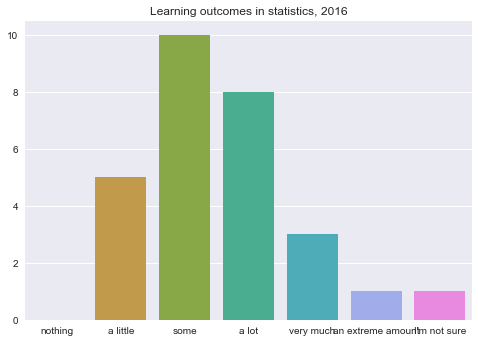

In [8]:
sns.barplot(qvalues_2016.index, qvalues_2016.values)
plt.title("Learning outcomes in statistics, 2016")

In [9]:
idx_2015 = ["nothing", "a little", "some", "a lot", "an extreme amount", "I'm not sure"]
qvalues_2015 = q.value_counts()
qvalues_2015 = qvalues_2015.reindex(idx_2015)

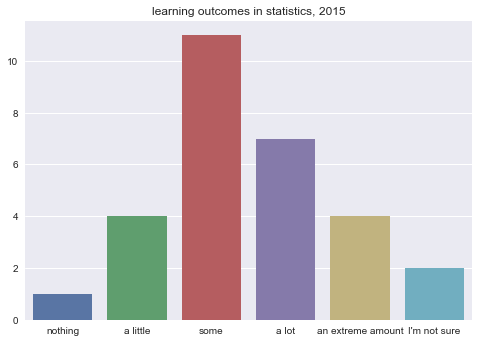

In [10]:
sns.barplot(qvalues_2015.index, qvalues_2015.values)
plt.title("learning outcomes in statistics, 2015")

### machine learning learning outcomes

In [11]:
ml_2016 = pd.Series([0, 8, 9, 6, 3, 0, 1], index=idx_2016)


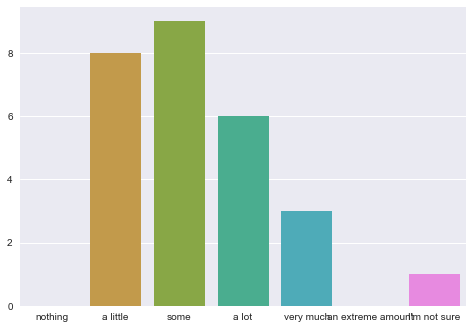

In [12]:
sns.barplot(ml_2016.index, ml_2016.values)

How does that relate with what people knew before about machine learning? We'll have to do that for 2015, because the 2016 data is all aggregates:

In [13]:
qvalues_2015

nothing               1
a little              4
some                 11
a lot                 7
an extreme amount     4
I'm not sure          2
Name: Q22_2, dtype: int64

In [14]:
ml_before = data["Q7_3"][1:]
ml_after = data["Q22_3"][1:]

In [15]:
ml_before.head()

1    3
2    6
3    4
4    3
5    3
Name: Q7_3, dtype: object

In [16]:
ml_before[ml_before == "1"] = "nothing"
ml_before[ml_before == "2"] = "a little"
ml_before[ml_before == "3"] = "some"
ml_before[ml_before == "4"] = "a lot"
ml_before[ml_before == "5"] = "very much"
ml_before[ml_before == "6"] = "an extreme amount"
ml_before[ml_before == "7"] = "I'm not sure"

ml_after[ml_after == "1"] = "nothing"
ml_after[ml_after == "2"] = "a little"
ml_after[ml_after == "3"] = "some"
ml_after[ml_after == "4"] = "a lot"
ml_after[ml_after == "5"] = "very much" 
ml_after[ml_after == "6"] = "an extreme amount"
ml_after[ml_after == "7"] = "I'm not sure"

In [17]:
idx_2015 = ["nothing", "a little", "some", "a lot", "very much", "an extreme amount", "I'm not sure"]

In [18]:
ml_before_counts = ml_before.value_counts()
ml_before_counts = ml_before_counts.reindex(idx_2015)
ml_after_counts = ml_after.value_counts()
ml_after_counts = ml_after_counts.reindex(idx_2015)


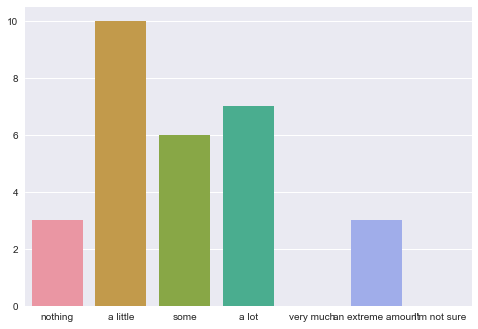

In [19]:
sns.barplot(ml_before_counts.index, ml_before_counts.values)

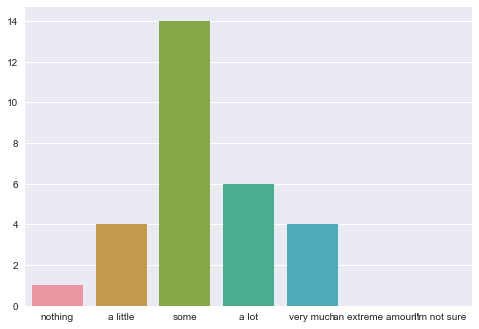

In [20]:
sns.barplot(ml_after_counts.index, ml_after_counts.values)

In [21]:
ml_comb = pd.DataFrame(ml_before)
ml_comb.columns = ["before"]

In [22]:
ml_comb["after"] = ml_after

In [23]:
ml_comb.head()

,before,after
1,some,some
2,an extreme amount,a lot
3,a lot,some
4,some,some
5,some,very much


In [24]:
def _plot_categorical(df, xlabel, ylabel, x_keys, y_keys, prefac, ax, cmap, s):
    """
    Plot two categorical variables against each other in a bubble plot.

    Parameters
    ----------
    df : pd.DataFrame
        A pandas DataFrame with the data

    xlabel : str
        The column name for the variable on the x-axis

    ylabel : str
        The column name for the variable on the y-axis

    x_keys : iterable
        A list containing the different categories in df[xlabel]

    y_keys: iterable
        A list containing the different categories in df[ylabel]

    prefac : float
        A pre-factor steering the shading of the bubbles

    ax : matplotlib.Axes object
        The matplotlib.Axes object to plot the bubble plot into

    cmap : matplotlib.cm.colormap
        A matplotlib colormap to use for shading the bubbles

    s : float
        A pre-factor changing the overall size of the bubbles

    Returns
    -------
    ax : matplotlib.Axes object
        The same matplotlib.Axes object for further manipulation

    """
    tuples, counts = [], []
    for i in range(len(x_keys)):
        for j in range(len(y_keys)):
            tuples.append((i,j))

            counts.append(len(df[(df[xlabel] == x_keys[i]) &
                                 (df[ylabel] == y_keys[j])]))

    print(counts)
    x, y = zip(*tuples)

    cmap = plt.cm.get_cmap(cmap)
    sizes = (np.array(counts)/np.sum(counts))

    ax.scatter(x, y, s=s*1000*sizes, marker='o', linewidths=1, edgecolor='black',
                c=cmap(prefac*sizes/(np.max(sizes)-np.min(sizes))), alpha=0.7)

    ax.set_xticks(np.arange(len(x_keys)))
    ax.set_xticklabels(x_keys)
    ax.set_xlim(np.min(x)-1, np.max(x)+1)
    ax.set_xlabel(xlabel)

    ax.set_yticks(np.arange(len(y_keys)))
    ax.set_yticklabels(y_keys)
    ax.set_ylim(np.min(y)-1, np.max(y)+1)
    ax.set_ylabel(ylabel)

    return ax


In [25]:
sns.set_context("talk")

[0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 1, 4, 5, 4, 0, 0, 0, 0, 4, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


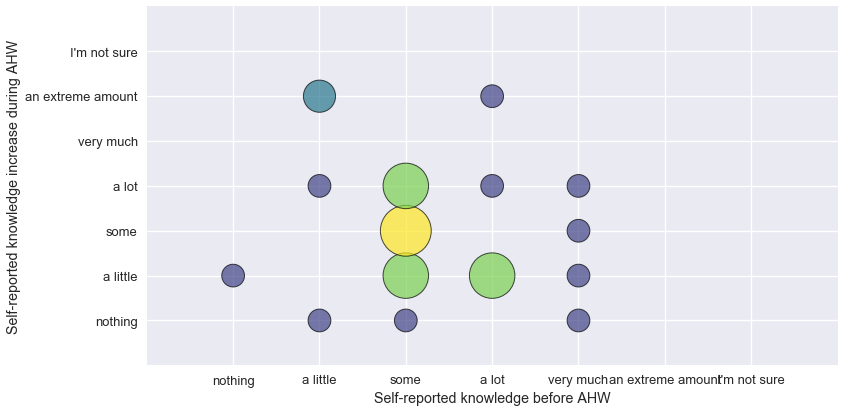

In [26]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))

ax = _plot_categorical(ml_comb, "after", "before", 
                       idx_2015, idx_2015, 1, ax, "viridis", 15)
ax.set_xlabel("Self-reported knowledge before AHW")
ax.set_ylabel("Self-reported knowledge increase during AHW")
plt.tight_layout()

Let's make the same figure for statistics:

In [27]:
s_before = data["Q7_2"][1:]
s_after = data["Q22_2"][1:]
s_before[s_before == "1"] = "nothing"
s_before[s_before == "2"] = "a little"
s_before[s_before == "3"] = "some"
s_before[s_before == "4"] = "a lot"
s_before[s_before == "5"] = "very much"
s_before[s_before == "6"] = "an extreme amount"
s_before[s_before == "7"] = "I'm not sure"

s_after[s_after == "1"] = "nothing"
s_after[s_after == "2"] = "a little"
s_after[s_after == "3"] = "some"
s_after[s_after == "4"] = "a lot"
s_after[s_after == "5"] = "very much"
s_after[s_after == "6"] = "an extreme amount"
s_after[s_after == "7"] = "I'm not sure"

s_before_counts = s_before.value_counts()
s_before_counts = s_before_counts.reindex(idx_2015)
s_after_counts = s_after.value_counts()
s_after_counts = s_after_counts.reindex(idx_2015)

s_comb = pd.DataFrame(s_before)
s_comb.columns = ["before"]

s_comb["after"] = s_after

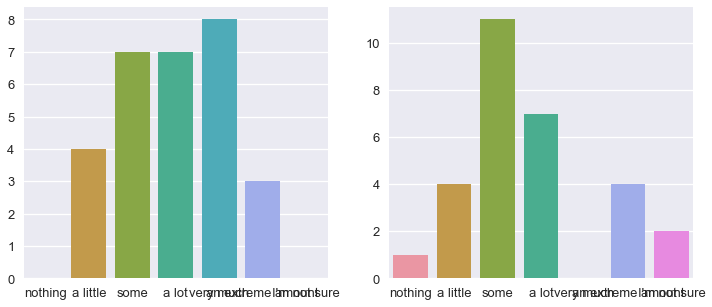

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5))
sns.barplot(s_before_counts.index, s_before_counts.values, ax=ax1)
sns.barplot(s_after_counts.index, s_after_counts.values, ax=ax2)



[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 3, 3, 3, 1, 0, 0, 0, 3, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0]


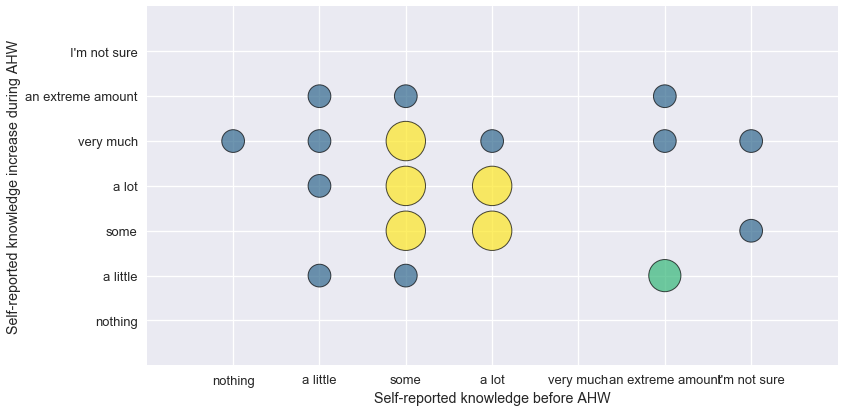

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))

ax = _plot_categorical(s_comb, "after", "before", 
                       idx_2015, idx_2015, 1, ax, "viridis", 15)
ax.set_xlabel("Self-reported knowledge before AHW")
ax.set_ylabel("Self-reported knowledge increase during AHW")
plt.tight_layout()

[0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 3, 3, 3, 1, 0, 0, 0, 3, 3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0]
[0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 2, 0, 1, 4, 5, 4, 0, 0, 0, 0, 4, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


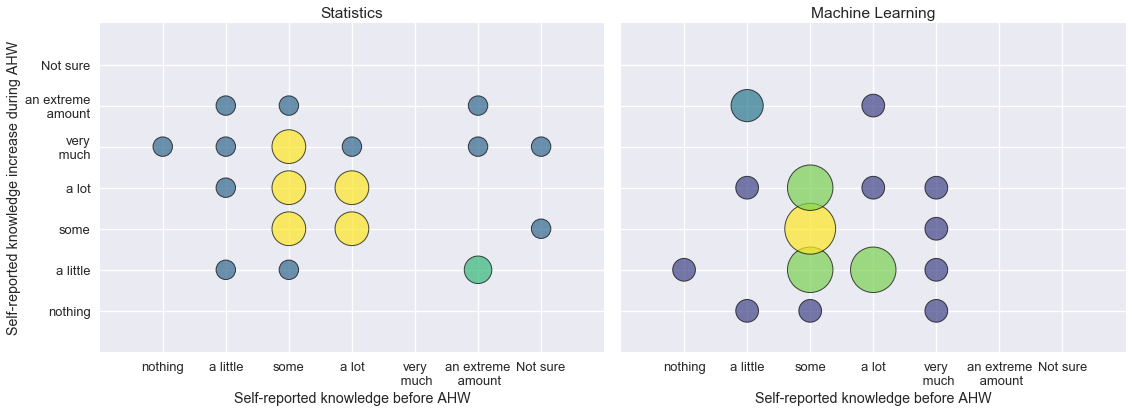

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16,6), sharey=True)

ax1 = _plot_categorical(s_comb, "after", "before", 
                       idx_2015, idx_2015, 1, ax1, "viridis", 11)
ax1.set_xlabel("Self-reported knowledge before AHW")
ax1.set_ylabel("Self-reported knowledge increase during AHW")
ax1.set_xticklabels(["nothing", "a little", "some", "a lot", "very\n much", "an extreme\n amount", "Not sure"])
ax1.set_yticklabels(["nothing", "a little", "some", "a lot", "very\n much","an extreme\n amount", "Not sure"])
ax1.set_title("Statistics")

ax2 = _plot_categorical(ml_comb, "after", "before", 
                       idx_2015, idx_2015, 1, ax2, "viridis", 15)
ax2.set_xlabel("Self-reported knowledge before AHW")
ax2.set_ylabel("")
ax2.set_title("Machine Learning")
ax2.set_xticklabels(["nothing", "a little", "some", "a lot","very\n much", "an extreme\n amount", "Not sure"])
ax2.set_yticklabels(["nothing", "a little", "some", "a lot", "very\n much","an extreme\n amount", "Not sure"])

plt.tight_layout()
plt.savefig("/Users/danielahuppenkothen/work/repositories/HackWeek-Writeup/fig/ahw_learning.png", format="png")

## Community Outcomes

In [31]:
idx_agree = ["Strongly Disagree", "Disagree", "Somewhat Disagree", 
             "Somewhat Agree", "Agree", "Strongly Agree", "I don't know"]

In [32]:
pre_collab_2016 = pd.Series([10, 5, 2, 1, 3, 7, 0], index=idx_agree)

In [33]:
pre_collab_2015 = data["Q23_6"][1:]
pre_collab_2015 = pre_collab_2015.dropna()

In [34]:
for p in pre_collab_2015.unique():
    pre_collab_2015[pre_collab_2015 == p] = idx_agree[int(p)-1]

In [35]:
idx_agree

['Strongly Disagree',
 'Disagree',
 'Somewhat Disagree',
 'Somewhat Agree',
 'Agree',
 'Strongly Agree',
 "I don't know"]

In [36]:
pre_collab_2016

Strongly Disagree    10
Disagree              5
Somewhat Disagree     2
Somewhat Agree        1
Agree                 3
Strongly Agree        7
I don't know          0
dtype: int64

In [37]:
pc_counts = pre_collab_2015.value_counts()
pc_counts = pc_counts.reindex(idx_agree) 
pc_counts = pc_counts.replace(np.nan, 0)# + pre_collab_2016

In [38]:
idx_agree_plot = ["Strongly\n Disagree", "Disagree", "Somewhat\n Disagree", 
             "Somewhat\n Agree", "Agree", "Strongly\n Agree", "I don't\n know"]

In [39]:
pc_counts

Strongly Disagree    9.0
Disagree             6.0
Somewhat Disagree    3.0
Somewhat Agree       1.0
Agree                2.0
Strongly Agree       8.0
I don't know         0.0
Name: Q23_6, dtype: float64

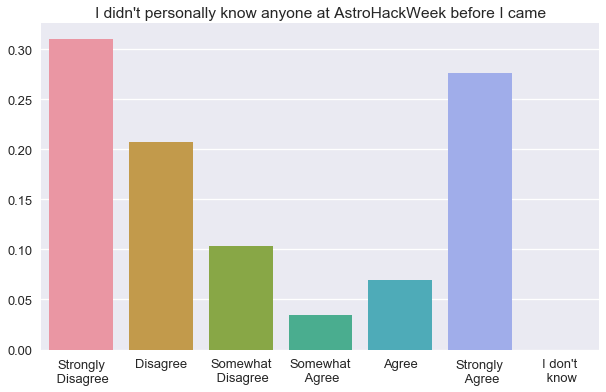

In [40]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
sns.barplot(pc_counts.index, pc_counts.values/pc_counts.values.sum(), ax=ax)
ax.set_xticklabels(idx_agree_plot)
ax.set_title("I didn't personally know anyone at AstroHackWeek before I came")

Belonging:

In [41]:
belong_2016 = pd.Series([0, 0, 2, 5 ,9, 12, 0], index=idx_agree)

In [42]:
belong_2015 = data["Q19_1"][1:]
belong_2015 = belong_2015.dropna()

for p in belong_2015.unique():
    belong_2015[belong_2015 == p] = idx_agree[int(p)-1]

bl_counts = belong_2015.value_counts()
bl_counts = bl_counts.reindex(idx_agree) 
bl_counts = bl_counts.replace(np.nan, 0) 
bl_counts = bl_counts+ belong_2016

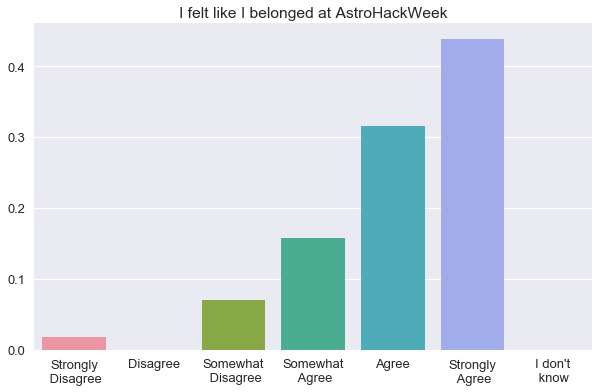

In [43]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
sns.barplot(bl_counts.index, bl_counts.values/bl_counts.values.sum(), ax=ax)
ax.set_xticklabels(idx_agree_plot)
ax.set_title("I felt like I belonged at AstroHackWeek")

Team contributions:

In [44]:
contrib_2016 = pd.Series([0, 1, 0, 4 , 11, 10, 2], index=idx_agree)

In [45]:
contrib_2015 = data["Q19_5"][1:]
contrib_2015 = contrib_2015.dropna()

for p in contrib_2015.unique():
    contrib_2015[contrib_2015 == p] = idx_agree[int(p)-1]

c_counts = contrib_2015.value_counts()
print(c_counts)

Strongly Agree       10
Agree                 9
Somewhat Disagree     5
Somewhat Agree        5
Name: Q19_5, dtype: int64


In [46]:
c_counts = c_counts.dropna()
c_counts = c_counts.reindex(idx_agree)
c_counts = c_counts.replace(np.nan, 0)
c_counts = c_counts + contrib_2016

In [47]:
c_counts

Strongly Disagree     0.0
Disagree              1.0
Somewhat Disagree     5.0
Somewhat Agree        9.0
Agree                20.0
Strongly Agree       20.0
I don't know          2.0
dtype: float64

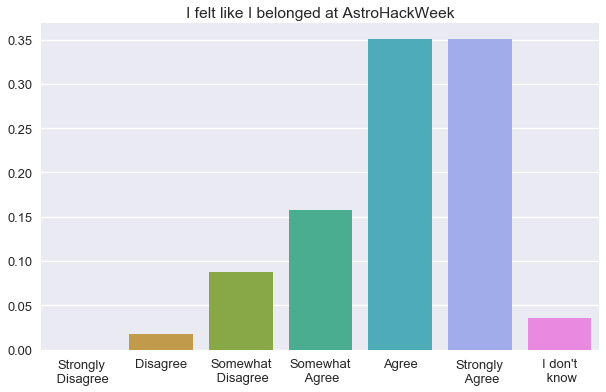

In [48]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
sns.barplot(c_counts.index, c_counts.values/c_counts.values.sum(), ax=ax)
ax.set_xticklabels(idx_agree_plot)
ax.set_title("I felt like I belonged at AstroHackWeek")

Combined version:

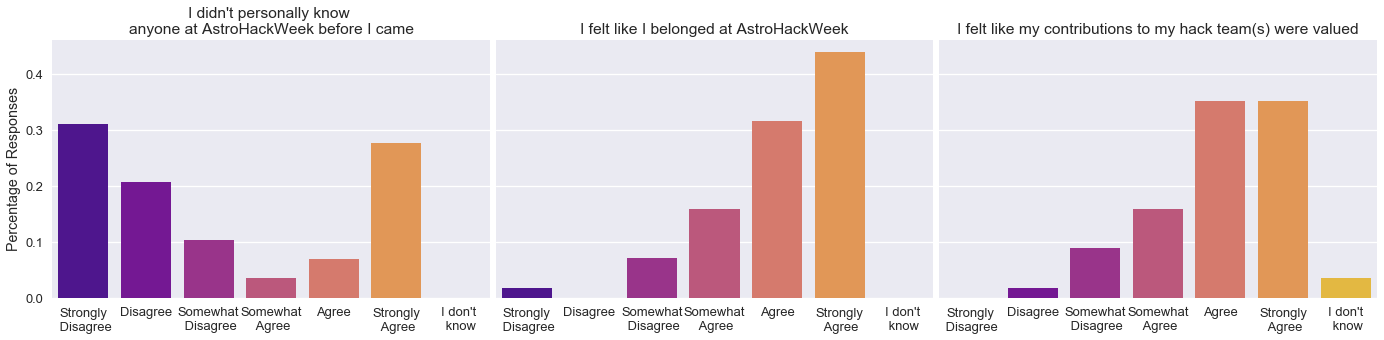

In [49]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,5), sharey=True)

sns.barplot(pc_counts.index, pc_counts.values/pc_counts.values.sum(), 
            ax=ax1, palette="plasma")
ax1.set_xticklabels(idx_agree_plot)
ax1.set_title("I didn't personally know \nanyone at AstroHackWeek before I came")

sns.barplot(bl_counts.index, bl_counts.values/bl_counts.values.sum(), 
            ax=ax2, palette="plasma")
ax2.set_xticklabels(idx_agree_plot)
ax2.set_title("I felt like I belonged at AstroHackWeek")

sns.barplot(c_counts.index, c_counts.values/c_counts.values.sum(), 
            ax=ax3, palette="plasma")
ax3.set_xticklabels(idx_agree_plot)
ax3.set_title("I felt like my contributions to my hack team(s) were valued")


ax1.set_ylabel("Percentage of Responses")
plt.tight_layout(w_pad=-2)
plt.savefig("/Users/danielahuppenkothen/work/repositories/HackWeek-Writeup/fig/ahw_community.png", format="png")

## Career outcomes:

Let's plot some career outcomes:

In [50]:
c1_2016 = pd.Series([0, 0, 0, 7 , 11, 10, 0], index=idx_agree)
c1_2015 = data["Q24_1"][1:]
c1_2015 = c1_2015.dropna()

for p in c1_2015.unique():
    c1_2015[c1_2015 == p] = idx_agree[int(p)-1]

c1_counts = c1_2015.value_counts()

c1_counts = c1_counts.dropna()
c1_counts = c1_counts.reindex(idx_agree)
c1_counts = c1_counts.replace(np.nan, 0)
c1_counts = c1_counts + c1_2016
print(c1_counts)
c1_title = "I believe that AstroHackWeek was useful for my future career"

Strongly Disagree     0.0
Disagree              0.0
Somewhat Disagree     0.0
Somewhat Agree       12.0
Agree                21.0
Strongly Agree       22.0
I don't know          2.0
dtype: float64


Next one:

In [51]:
c2_2016 = pd.Series([0, 0, 1, 6 , 12, 9, 0], index=idx_agree)
c2_2015 = data["Q24_4"][1:]
c2_2015 = c2_2015.dropna()

for p in c2_2015.unique():
    c2_2015[c2_2015 == p] = idx_agree[int(p)-1]

c2_counts = c2_2015.value_counts()

c2_counts = c2_counts.dropna()
c2_counts = c2_counts.reindex(idx_agree)
c2_counts = c2_counts.replace(np.nan, 0)
c2_counts = c2_counts + c2_2016
print(c2_counts)

c2_title = "I feel like I learned things \nwhich improve my day to day research"

Strongly Disagree     0.0
Disagree              0.0
Somewhat Disagree     2.0
Somewhat Agree       14.0
Agree                19.0
Strongly Agree       21.0
I don't know          1.0
dtype: float64


And a third one:

In [52]:
c3_2016 = pd.Series([0, 0, 0, 5, 13, 10, 0], index=idx_agree)
c3_2015 = data["Q24_3"][1:]
c3_2015 = c3_2015.dropna()

for p in c3_2015.unique():
    c3_2015[c3_2015 == p] = idx_agree[int(p)-1]

c3_counts = c3_2015.value_counts()

c3_counts = c3_counts.dropna()
c3_counts = c3_counts.reindex(idx_agree)
c3_counts = c3_counts.replace(np.nan, 0)
c3_counts = c3_counts + c3_2016
print(c3_counts)

c3_title = "I believe that AstroHackWeek \nhelped make me a better scientist"


Strongly Disagree     0.0
Disagree              0.0
Somewhat Disagree     2.0
Somewhat Agree        9.0
Agree                24.0
Strongly Agree       22.0
I don't know          0.0
dtype: float64


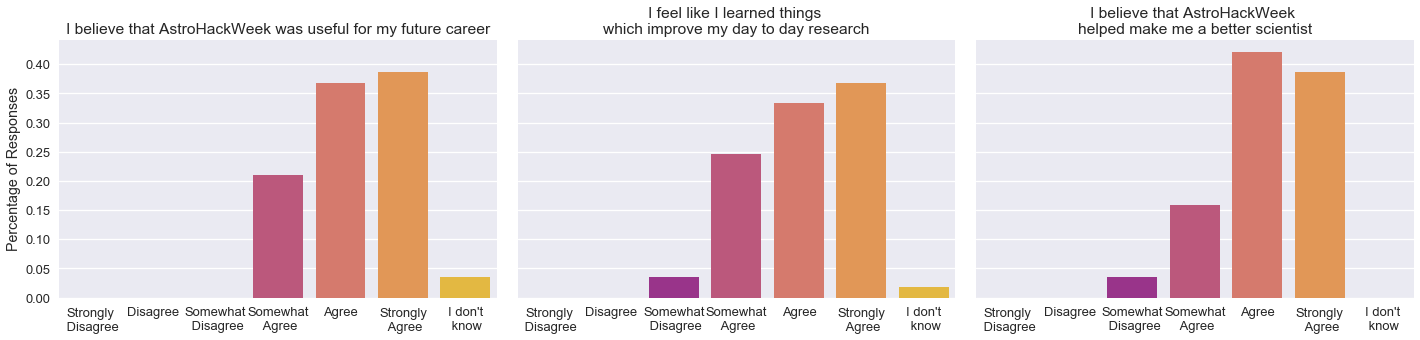

In [53]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(20,5), sharey=True)

sns.barplot(c1_counts.index, c1_counts.values/c1_counts.values.sum(), 
            ax=ax1, palette="plasma")
ax1.set_xticklabels(idx_agree_plot)
ax1.set_title(c1_title)

sns.barplot(c2_counts.index, c2_counts.values/c2_counts.values.sum(), 
            ax=ax2, palette="plasma")
ax2.set_xticklabels(idx_agree_plot)
ax2.set_title(c2_title)

sns.barplot(c3_counts.index, c3_counts.values/c3_counts.values.sum(), 
            ax=ax3, palette="plasma")
ax3.set_xticklabels(idx_agree_plot)
ax3.set_title(c3_title)


ax1.set_ylabel("Percentage of Responses")
plt.tight_layout(w_pad=-2)
plt.savefig("/Users/danielahuppenkothen/work/repositories/HackWeek-Writeup/fig/ahw_career.png", format="png")